# Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10, 6)

import warnings
warnings.filterwarnings('ignore')

# Read Dataset

In [2]:
df = pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
# Our target variable(Dependent variable) is sales.

# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


# Lets create a new independet variable for simple linear regression. (Feature Engineering)

In [7]:
df["total_spend"] = df["TV"] + df["radio"] + df.newspaper
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


In [8]:
df = df.iloc[:, [0,1,2,4,3]]
df.head()

,TV,radio,newspaper,total_spend,sales
0,230.1,37.8,69.2,337.1,22.1
1,44.5,39.3,45.1,128.9,10.4
2,17.2,45.9,69.3,132.4,9.3
3,151.5,41.3,58.5,251.3,18.5
4,180.8,10.8,58.4,250.0,12.9


# Data Visulization

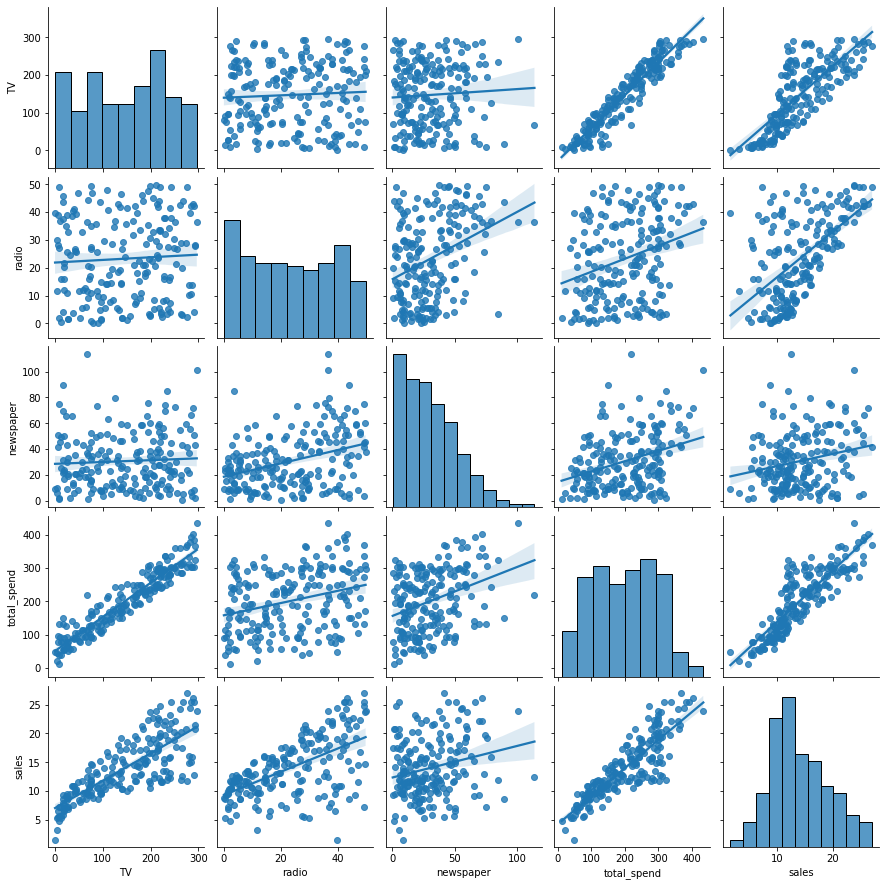

In [9]:
sns.pairplot(df , kind='reg');

In [10]:
df.corr()

,TV,radio,newspaper,total_spend,sales
TV,1.000000,0.054809,0.056648,0.945330,0.782224
radio,0.054809,1.000000,0.354104,0.293211,0.576223
newspaper,0.056648,0.354104,1.000000,0.343059,0.228299
total_spend,0.945330,0.293211,0.343059,1.000000,0.867712
sales,0.782224,0.576223,0.228299,0.867712,1.000000


In [11]:
for i in df.drop(columns = "sales"):
    print(f"corr between sales and {i:<12}: {df.sales.corr(df[i])}")

corr between sales and TV          : 0.7822244248616066
corr between sales and radio       : 0.5762225745710552
corr between sales and newspaper   : 0.22829902637616534
corr between sales and total_spend : 0.8677123027017418


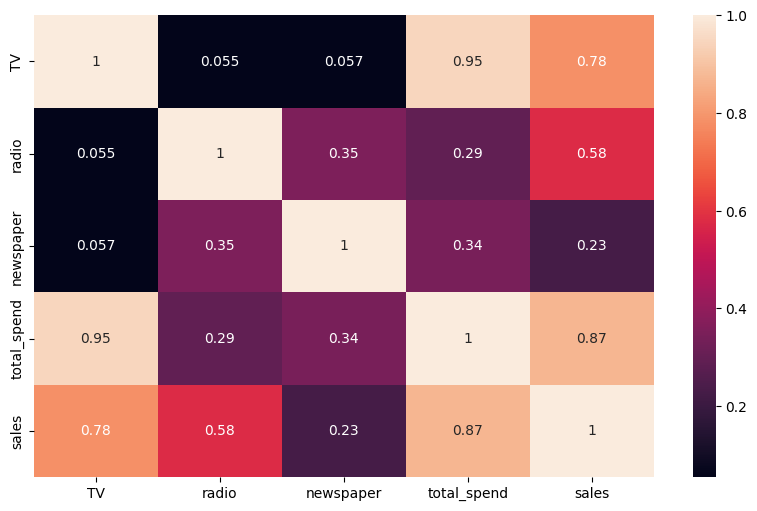

In [12]:
sns.heatmap(df.corr() , annot = True);

In [13]:
df.corr()["sales"].sort_values(ascending=False)

sales          1.000000
total_spend    0.867712
TV             0.782224
radio          0.576223
newspaper      0.228299
Name: sales, dtype: float64

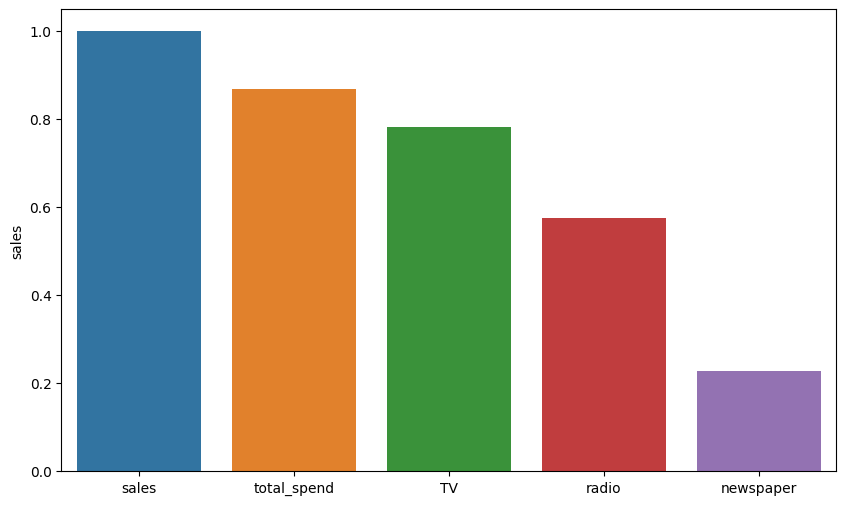

In [14]:
sns.barplot(x = df.corr()["sales"].sort_values(ascending = False).index , y = df.corr()["sales"].sort_values(ascending=False));

In [15]:
df = df[["total_spend" , "sales"]]
df.head()

,total_spend,sales
0,337.1,22.1
1,128.9,10.4
2,132.4,9.3
3,251.3,18.5
4,250.0,12.9


In [16]:
corr_rate = df.sales.corr(df.total_spend)
corr_rate

0.8677123027017418

In [17]:
r2_score = corr_rate**2   # Coefficient of determination(R2)
r2_score

0.7529246402599592

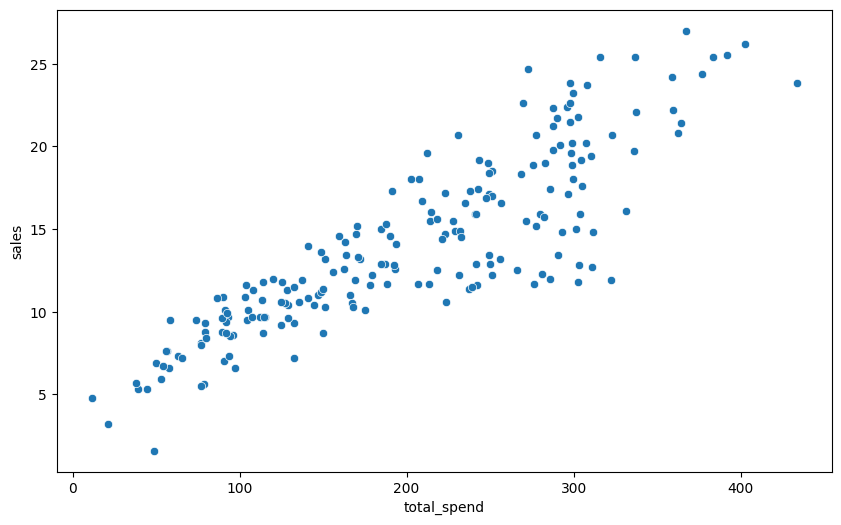

In [18]:
sns.scatterplot(x = df["total_spend"] , y = df["sales"] );

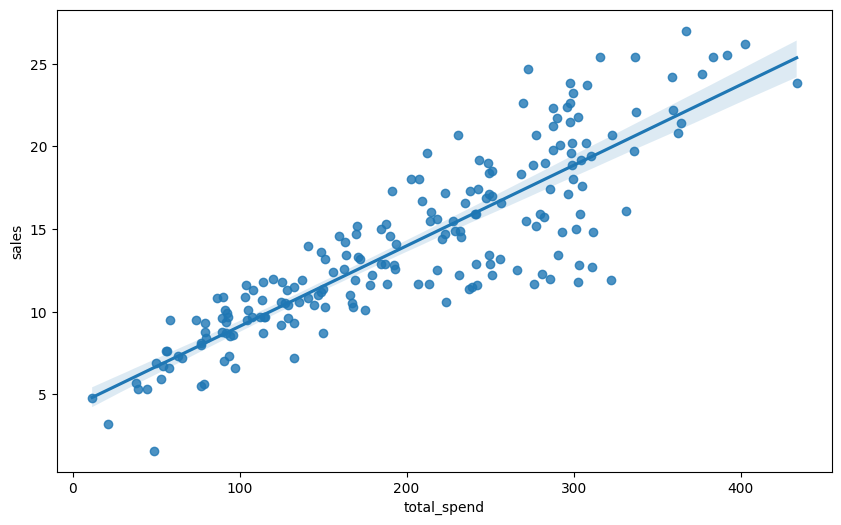

In [19]:
sns.regplot(x = df["total_spend"] , y = df["sales"] );

# Train-Test-Split time

In [20]:
# from sklearn.model_selection import train_test_split

# X = df.drop("sales" , axis = 1)
# y = df["sales"]

# X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.3 , random_state=15 )

In [21]:
from sklearn.model_selection import train_test_split

X = df["total_spend"]
y = df["sales"]

X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.1 , random_state=15 )

X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)

y_train = np.array(X_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [22]:
X_train.shape

(180, 1)

In [23]:
np.polyfit(X , y, deg = 1)  # deg = 1 because linear regression.
# First result slope , second intercept(bias). 

array([0.04868788, 4.24302822])

In [24]:
slope , intercept = np.polyfit(X , y , deg = 1 )

# Lets do Normalization

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler()

In [27]:
X_train = scaler.fit_transform(X_train)

In [28]:
X_test = scaler.transform(X_test)

# Create a model

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lr = LinearRegression()

# Fit our model

In [31]:
lr.fit(X_train , y_train)

LinearRegression()

# Test our model

In [32]:
from sklearn.metrics import mean_absolute_error , mean_squared_error ,r2_score 

In [33]:
train_preds = lr.predict(X_train)

print(mean_absolute_error(y_train , train_preds))
print(mean_squared_error(y_train , train_preds))
print(r2_score(y_train , train_preds))

5.631051180898794e-14
3.9591000506385375e-27
1.0


In [34]:
test_preds = lr.predict(X_test)

print(mean_absolute_error(y_test , test_preds))
print(mean_squared_error(y_test , test_preds))
print(r2_score(y_test , test_preds))

# Why so bad results, I didin't understand yet. I'll solve it tomorrow.

173.1599999999999
40331.15599999998
-1391.945020312479


# 

In [ ]:
# Done